In [1]:
from utils.config import FitSettings
from utils.dataProcessor import DataProcessor
from utils.templateMaker import TemplateMaker
from utils.signalExtractor import SignalExtractor

import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import os

import mplhep as hep
hep.style.use(hep.style.ALICE)

# Read the data
When the data is read it must be defined in the following way: output folder containing subfolders corresponding to the datasets. 

In [2]:
directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/"
#directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/030225_tableReaderwME/"
#directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/190325_nominalCuts/"
datasets = [
    #"DQ_LHC22_pass7_skimmed_dielectron_kaon",
    "DQ_LHC24aj_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24af_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24ag_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24al_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24am_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24an_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24ao_pass1_skimmed_dielectron_kaon"
]

In [3]:
settings = FitSettings()
processor = DataProcessor(directory_to_TRoutput_from_HL, datasets, verbose=False, settings=settings)

# Read the dataset
total_data, _ = processor.read_data(read_ME=False)

******* DATASET: DQ_LHC24aj_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24af_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24ag_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24al_pass1_skimmed_dielectron_kaon
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1572020/AO2D.root
⚠️ Dataframe is empty. 554322, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571953/AO2D.root/hy_1571953 is not being read properly
⚠️ Dataframe is empty. 554207, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571945/AO2D.root/hy_1571945 is not being read properly
⚠️ Dataframe is empty. 554201, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571943/AO2D.root/hy_157

In [4]:
# Preprocess the data (removing nan and relabeling columns)
total_data = processor.pre_processing(total_data)

⚠️ WARNING: 8 candidates pass no cuts - fIsJpsiFromBSelected =0 
⚠️ WARNING: 8 candidates pass no cuts - fIsBarrelSelected =0 


In [5]:
# Translate from bitmap columns and create columns with cuts being passed
config_cuts, name_electron_cuts, name_kaon_cuts = processor.read_cuts_from_configfile()

In [6]:
# This returns a warning if there is a mismatch in the entries in the histograms of the AnalyisResults.root file and the derived dataset
processor.compare_to_AnalysisResult(total_data, verbose=False)

⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24af_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24ag_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24am_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24an_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24ao_pass1_skimmed_dielectron_kaon/AnalysisResults.root file no

In [7]:
#plot_bins = np.linspace(3, 10, 500)
#processor.plot_datasets(total_data, bins=plot_bins)

# Read MC

In [8]:
# reading a single AO2D.root.file 
#list_of_dataframes, _ = mc_processor.read_AO2D(MCdatapath, _, _, _, "dileptonAOD.root")
#local_run_df = pd.concat(list_of_dataframes, ignore_index=True) if list_of_dataframes else pd.DataFrame()

In [9]:
MCdatapath = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/"
mc_processor = DataProcessor(MCdatapath, ["LHC25b17"], verbose=False, settings=settings)

# Read the dataset
total_mc, _ = mc_processor.read_data(read_ME=False)

******* DATASET: LHC25b17
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651883/AO2D.root
⚠️ Dataframe is empty. 556370, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651756/AO2D.root/hy_1651756 is not being read properly
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651749/AO2D.root
⚠️ Dataframe is empty. 555965, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651743/AO2D.root/hy_1651743 is not being read properly
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651680/AO2D.root
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651673/AO2D.root
⚠️ Dataframe is empty. 554322, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_

In [10]:
total_mc = mc_processor.pre_processing(total_mc)

⚠️ WARNING: 11 candidates pass no cuts - fIsJpsiFromBSelected =0 
⚠️ WARNING: 11 candidates pass no cuts - fIsBarrelSelected =0 


In [11]:
mc_config_cuts, mc_name_electron_cuts, mc_name_kaon_cuts = mc_processor.read_cuts_from_configfile()

In [12]:
mc_processor.compare_to_AnalysisResult(total_mc, verbose=False)

# Apply cuts

In [13]:
data_with_cuts = total_data
mc_with_cuts = total_mc

tauCut = 0.0004
chi2cut = 2

In [14]:
data_with_cuts = data_with_cuts.loc[data_with_cuts["fTauxyBcandidate"] > tauCut]
mc_with_cuts = mc_with_cuts.loc[mc_with_cuts["fTauxyBcandidate"] > tauCut]

In [15]:
data_with_cuts = data_with_cuts.loc[data_with_cuts["fChi2Bcandidate"] < chi2cut]
mc_with_cuts = mc_with_cuts.loc[mc_with_cuts["fChi2Bcandidate"] < chi2cut]

In [16]:
jpsi_minMass = 2.8
jpsi_maxMass = 3.2
data_with_cuts = data_with_cuts.loc[(data_with_cuts["fMassDileptonCandidate"] > jpsi_minMass)&(data_with_cuts["fMassDileptonCandidate"] < jpsi_maxMass)]
mc_with_cuts = mc_with_cuts.loc[(mc_with_cuts["fMassDileptonCandidate"] > jpsi_minMass)&(mc_with_cuts["fMassDileptonCandidate"] < jpsi_maxMass)]

# Signal extraction

In [28]:
def SEbin2(data_with_cuts, mc_with_cuts, ylim, legend_loc, textbox_position): 
    
    settings2 = FitSettings(pTmin=0, pTmax=2, fitMin=4.5, fitMax=6.0, bin_width=0.04, kde_window=0.2, allowed_fluctuation_for_corrbkg=0.1)

    # generate MC templates
    templateMaker2 = TemplateMaker(mc_with_cuts, settings=settings2)
    corrbkg_template, kde_corrbkg_template, template_bins, mc_signal_mass, mc_fraction_of_corrbkg = templateMaker2.generate_mc_templates()
    #templateMaker6.plot_mc_signals()

    extractor = SignalExtractor(data_with_cuts, settings=settings2, combkg_function="ratio_second_degree_polynomials")

    # initialize SE with output from template maker 
    #extractor.mc_signal_mass = mc_signal_mass
    extractor.fraction_of_correlated_background = mc_fraction_of_corrbkg
    extractor.template_bins = template_bins
    extractor.corrbkg_template_counts = kde_corrbkg_template

    # perform fit etc.
    extractor.bin_data()
    extractor.fit()
    extractor.calculate_signal_size()
    extractor.fit() 

    fig, ax = extractor.plot_invariant_mass(legend_loc=legend_loc)
    plt.ylim(0, ylim)
    ax.text(textbox_position[0], textbox_position[1], extractor.generate_plot_text(), transform=ax.transAxes, fontsize=settings2.fontsize)
    if save_figures==True: plt.savefig('figures/QM2025_SEbin2.pdf')


def SEbin3(data_with_cuts, mc_with_cuts, ylim, legend_loc, textbox_position): 
    
    settings3 = FitSettings(pTmin=2, pTmax=4, fitMin=4.5, fitMax=6.0, bin_width=0.04, kde_window=0.2, allowed_fluctuation_for_corrbkg=0.1)

    # generate MC templates
    templateMaker3 = TemplateMaker(mc_with_cuts, settings=settings3)
    corrbkg_template, kde_corrbkg_template, template_bins, mc_signal_mass, mc_fraction_of_corrbkg = templateMaker3.generate_mc_templates()
    #templateMaker6.plot_mc_signals()

    extractor = SignalExtractor(data_with_cuts, settings=settings3, combkg_function="second_degree_polynomial")

    # initialize SE with output from template maker 
    #extractor.mc_signal_mass = mc_signal_mass
    extractor.fraction_of_correlated_background = mc_fraction_of_corrbkg
    extractor.template_bins = template_bins
    extractor.corrbkg_template_counts = kde_corrbkg_template

    # perform fit etc.
    extractor.bin_data()
    extractor.fit()
    extractor.calculate_signal_size()
    extractor.fit() 

    fig, ax = extractor.plot_invariant_mass(legend_loc=legend_loc)
    plt.ylim(0, ylim)
    ax.text(textbox_position[0], textbox_position[1], extractor.generate_plot_text(), transform=ax.transAxes, fontsize=settings3.fontsize)
    if save_figures==True: plt.savefig('figures/QM2025_SEbin3.pdf')

def SEbin4(data_with_cuts, mc_with_cuts, ylim, legend_loc, textbox_position): 
    
    settings4 = FitSettings(pTmin=4, pTmax=6, fitMin=4.2, fitMax=6.2, bin_width=0.04, kde_window=0.3, allowed_fluctuation_for_corrbkg=0.1)

    # generate MC templates
    templateMaker4 = TemplateMaker(mc_with_cuts, settings=settings4)
    corrbkg_template, kde_corrbkg_template, template_bins, mc_signal_mass, mc_fraction_of_corrbkg = templateMaker4.generate_mc_templates()
    #templateMaker6.plot_mc_signals()

    extractor = SignalExtractor(data_with_cuts, settings=settings4, combkg_function="exponential")

    # initialize SE with output from template maker 
    #extractor.mc_signal_mass = mc_signal_mass
    extractor.fraction_of_correlated_background = mc_fraction_of_corrbkg
    extractor.template_bins = template_bins
    extractor.corrbkg_template_counts = kde_corrbkg_template

    # perform fit etc.
    extractor.bin_data()
    extractor.fit()
    extractor.calculate_signal_size()
    extractor.fit() 

    fig, ax = extractor.plot_invariant_mass(legend_loc=legend_loc)
    plt.ylim(0, ylim)
    ax.text(textbox_position[0], textbox_position[1], extractor.generate_plot_text(), transform=ax.transAxes, fontsize=settings4.fontsize)
    if save_figures==True: plt.savefig('figures/QM2025_SEbin4.pdf')

def SEbin5(data_with_cuts, mc_with_cuts, ylim, legend_loc, textbox_position): 
    
    settings5 = FitSettings(pTmin=6, pTmax=8, fitMin=4.0, fitMax=7.0, bin_width=0.04, kde_window=0.01, allowed_fluctuation_for_corrbkg=0.1)

    # generate MC templates
    templateMaker5 = TemplateMaker(mc_with_cuts, settings=settings5)
    corrbkg_template, kde_corrbkg_template, template_bins, mc_signal_mass, mc_fraction_of_corrbkg = templateMaker5.generate_mc_templates()
    #templateMaker6.plot_mc_signals()

    extractor = SignalExtractor(data_with_cuts, settings=settings5, combkg_function="ratio_second_degree_polynomials")

    # initialize SE with output from template maker 
    #extractor.mc_signal_mass = mc_signal_mass
    extractor.fraction_of_correlated_background = mc_fraction_of_corrbkg
    extractor.template_bins = template_bins
    extractor.corrbkg_template_counts = kde_corrbkg_template

    # perform fit etc.
    extractor.bin_data()
    extractor.fit()
    extractor.calculate_signal_size()
    extractor.fit() 

    fig, ax = extractor.plot_invariant_mass(legend_loc=legend_loc)
    plt.ylim(0, ylim)
    ax.text(textbox_position[0], textbox_position[1], extractor.generate_plot_text(), transform=ax.transAxes, fontsize=settings5.fontsize)
    if save_figures==True: plt.savefig('figures/QM2025_SEbin5.pdf')

def SEbin6(data_with_cuts, mc_with_cuts, ylim, legend_loc, textbox_position): 
    
    settings6 = FitSettings(pTmin=8, pTmax=10, fitMin=4.2, fitMax=6.2, bin_width=0.04, kde_window=0.2, allowed_fluctuation_for_corrbkg=0.1)

    # generate MC templates
    templateMaker6 = TemplateMaker(mc_with_cuts, settings=settings6)
    corrbkg_template, kde_corrbkg_template, template_bins, mc_signal_mass, mc_fraction_of_corrbkg = templateMaker6.generate_mc_templates()
    #templateMaker6.plot_mc_signals()

    extractor = SignalExtractor(data_with_cuts, settings=settings6, combkg_function="exponential")

    # initialize SE with output from template maker 
    #extractor.mc_signal_mass = mc_signal_mass
    extractor.fraction_of_correlated_background = mc_fraction_of_corrbkg
    extractor.template_bins = template_bins
    extractor.corrbkg_template_counts = kde_corrbkg_template

    # perform fit etc.
    extractor.bin_data()
    extractor.fit()
    extractor.calculate_signal_size()
    extractor.fit() 

    fig, ax = extractor.plot_invariant_mass(legend_loc=legend_loc)
    plt.ylim(0, ylim)
    ax.text(textbox_position[0], textbox_position[1], extractor.generate_plot_text(), transform=ax.transAxes, fontsize=settings6.fontsize)
    if save_figures==True: plt.savefig('figures/QM2025_SEbin6.pdf')

def SEbin7(data_with_cuts, mc_with_cuts, ylim, legend_loc, textbox_position): 
    
    settings7 = FitSettings(pTmin=10, pTmax=14, fitMin=4.2, fitMax=6.2, bin_width=0.04, kde_window=0.01, allowed_fluctuation_for_corrbkg=0.1)

    # generate MC templates
    templateMaker7 = TemplateMaker(mc_with_cuts, settings=settings7)
    corrbkg_template, kde_corrbkg_template, template_bins, mc_signal_mass, mc_fraction_of_corrbkg = templateMaker7.generate_mc_templates()
    #templateMaker7.plot_mc_signals()

    extractor = SignalExtractor(data_with_cuts, settings=settings7, combkg_function="exponential")

    # initialize SE with output from template maker 
    #extractor.mc_signal_mass = mc_signal_mass
    extractor.fraction_of_correlated_background = mc_fraction_of_corrbkg
    extractor.template_bins = template_bins
    extractor.corrbkg_template_counts = kde_corrbkg_template

    # perform fit etc.
    extractor.bin_data()
    extractor.fit()
    extractor.calculate_signal_size()
    extractor.fit() 

    fig, ax = extractor.plot_invariant_mass(legend_loc=legend_loc)
    plt.ylim(0,ylim)
    ax.text(textbox_position[0], textbox_position[1], extractor.generate_plot_text(), transform=ax.transAxes, fontsize=settings7.fontsize)
    if save_figures==True: plt.savefig('figures/QM2025_SEbin7.pdf')
        
def SEbin8(data_with_cuts, mc_with_cuts, ylim, legend_loc, textbox_position): 
    
    settings8 = FitSettings(pTmin=14, pTmax=20, fitMin=4.5, fitMax=6.0, bin_width=0.04, kde_window=0.2, allowed_fluctuation_for_corrbkg=0.1)

    # generate MC templates
    templateMaker8 = TemplateMaker(mc_with_cuts, settings=settings8)
    corrbkg_template, kde_corrbkg_template, template_bins, mc_signal_mass, mc_fraction_of_corrbkg = templateMaker8.generate_mc_templates()
    #templateMaker7.plot_mc_signals()

    extractor = SignalExtractor(data_with_cuts, settings=settings8, combkg_function="exponential")

    # initialize SE with output from template maker 
    #extractor.mc_signal_mass = mc_signal_mass
    extractor.fraction_of_correlated_background = mc_fraction_of_corrbkg
    extractor.template_bins = template_bins
    extractor.corrbkg_template_counts = kde_corrbkg_template

    # perform fit etc.
    extractor.bin_data()
    extractor.fit()
    extractor.calculate_signal_size()
    extractor.fit() 

    fig, ax = extractor.plot_invariant_mass(legend_loc=legend_loc)
    plt.ylim(0,ylim)
    ax.text(textbox_position[0], textbox_position[1], extractor.generate_plot_text(), transform=ax.transAxes, fontsize=settings8.fontsize)
    if save_figures==True: plt.savefig('figures/QM2025_SEbin8.pdf')

In [61]:
import numpy as np
import pandas as pd
from iminuit import Minuit
from iminuit.cost import LeastSquares
import inspect

import matplotlib.pyplot as plt 
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

import scipy.integrate as integrate

from utils.config import FitSettings

class SignalExtractor:
    def __init__(self, df: pd.DataFrame, settings: FitSettings, combkg_function='exponential'):
        
        self.settings = settings
            
        self.df = df.loc[
            (df[self.settings.pt_column_name] > self.settings.pTmin) &
            (df[self.settings.pt_column_name] < self.settings.pTmax)
        ]

        self.number_of_bins = int((self.settings.fitMax-self.settings.fitMin)/self.settings.bin_width)
        self.bins = np.linspace(self.settings.fitMin, self.settings.fitMax, self.number_of_bins + 1)
        self.bin_centers = (self.bins[:-1] + self.bins[1:]) / 2

        self.data_counts = None
        self.data_errors = None
        self.bin_edges = None
        
        self.combkg_function = combkg_function
        
        self.signal_size = None
        self.fit_params = None
        self.shift_corrbkg = 0

    def bin_data(self):
        self.data_counts, self.bin_edges = np.histogram(self.df[self.settings.mass_column_name], bins=self.bins)
        self.data_errors = np.sqrt(self.data_counts)
        
    def _get_non_empty_bins(self):
        bin_mask = self.data_counts >= 1
        return self.bin_centers[bin_mask], self.data_counts[bin_mask], self.data_errors[bin_mask]
    
    def gauss(self, x, mu, sigma):
        return np.exp(-0.5 * ((x - mu) / sigma) ** 2)
    
    def poly2(self, x, a, b, c):
        return a + b*x + c*x*x
    
    def poly2_ratio(self, x, a, b, c, d, e, f):
        return self.poly2(x, a, b, c)/self.poly2(x, d, e, f)
    
    def corrbkg_template_func(self, x):
        total_corrbkg_template_counts = sum(self.corrbkg_template_counts.values())
        bin_index = np.digitize(x, self.template_bins) - 1 
        bin_index = np.clip(bin_index, 0, len(total_corrbkg_template_counts) - 1) 
        return total_corrbkg_template_counts[bin_index]
    
    def template_lookup(self, x, template):
        bin_index = np.digitize(x, self.bins) - 1
        bin_index = np.clip(bin_index, 0, len(template) - 1)
        return template[bin_index]

    def total_fit_func_exp(self, x, n_corrbkg, n_sig, mu, sigma, n_combkg, a):
        
        return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))

    def total_fit_func_poly2(self, x, n_corrbkg, n_sig, mu, sigma, a, b, c):
        
        return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + self.poly2(x, a, b, c)

    def total_fit_func_poly2ratio(self, x, n_corrbkg, n_sig, mu, sigma, a, b, c, d, e, f):
        
        return (n_corrbkg * (self.corrbkg_template_func(x) - self.shift_corrbkg)) + (n_sig * self.gauss(x, mu, sigma)) + self.poly2_ratio(x, a, b, c, d, e, f)

    def fit(self): 
    
        #exclude bins with few counts in the fit
        x_data, y_data, y_data_err = self._get_non_empty_bins()
        
        # define total fit function based on the combinatorial background defined in the initialization
        if self.combkg_function == 'exponential':
            self.total_fit_func = self.total_fit_func_exp
        elif self.combkg_function == 'second_degree_polynomial':
            self.total_fit_func = self.total_fit_func_poly2
        elif self.combkg_function == 'ratio_second_degree_polynomials':
            self.total_fit_func = self.total_fit_func_poly2ratio
        else:
            raise ValueError(f"Unknown background function: {self.combkg_function}")

        # ----- Define staring values of the fit ------
        if self.fit_params == None: # first time, set the starting guess to 1 and physical values for the gaussian
            param_values = {}
            func_params = inspect.signature(self.total_fit_func).parameters
            for f in func_params: 
                if f=='x': continue
                elif f=='n_sig': param_values[f] = 100
                elif f=='mu': param_values[f] = 5.3
                elif f=='sigma': param_values[f] = 0.01
                else: param_values[f] = 1
        else: param_values = self.fit_params.to_dict()  #or use the results from the last fit as starting values on the next
        #print("Starting values for the fit: ", param_values)
            
        # ----- Initialize fit ------
        least_squares = LeastSquares(x_data, y_data, y_data_err, self.total_fit_func)
        minuit = Minuit(least_squares, **param_values)
        
        # ----- Set limits ------
        if "sigma" in param_values: minuit.limits["sigma"] = (0.02, 0.2)
        if "mu" in param_values: minuit.limits["mu"] = (5.1, 5.5)
        if "n_sig" in param_values: minuit.limits["n_sig"] = (0., None) # scaling must be positive
        
        # fix the ratio of the correlated background to the signal size
        if self.signal_size is not None:
            self.fix_n_corr_to_signal_size()
            lower_limit_n_corr = self.n_corr_scaled_with_signal_size - (self.settings.allowed_fluctuation_for_corrbkg*self.n_corr_scaled_with_signal_size)
            upper_limit_n_corr = self.n_corr_scaled_with_signal_size + (self.settings.allowed_fluctuation_for_corrbkg*self.n_corr_scaled_with_signal_size)
            if "n_corrbkg" in param_values: minuit.limits["n_corrbkg"] = (lower_limit_n_corr, upper_limit_n_corr ) 
        else:
            if "n_corrbkg" in param_values: minuit.limits["n_corrbkg"] = (0., None) 

        # ----- Peform fit ------
        minuit.migrad()
        self.fit_params = minuit.values
        
        self.chi2_reduced = minuit.fval / (len(self.bin_centers) - minuit.nfit)
        
        # ----- Define shift of correlated background ------
        self.shift_corrbkg = self.settings.pdg_mass_b_meson - self.fit_params["mu"]

    def _integrate_signal(self):
        mu = self.fit_params["mu"]
        sigma = self.fit_params["sigma"]
        
        self.signal_range_min = mu - 3 * sigma
        self.signal_range_max = mu + 3 * sigma
        
        integral, error = integrate.quad(self.gauss, self.signal_range_min, self.signal_range_max, args=(mu, sigma))
        self.signal_size = (self.fit_params["n_sig"] * integral) / self.settings.bin_width

    def _calculate_signal_plus_background(self):
        
        mask = (self.bin_centers >= self.signal_range_min) & (self.bin_centers <= self.signal_range_max)
        self.signal_plus_background = np.sum(self.data_counts[mask])
    
    def calculate_signal_size(self): 
        
        self._integrate_signal()
        self._calculate_signal_plus_background()

        self.signal_size_error = np.sqrt(self.signal_plus_background)
        self.significance = self.signal_size / self.signal_size_error
        
    def fix_n_corr_to_signal_size(self):

        f_c = self.fraction_of_correlated_background
        
        # integrate the signal (must be done again as it is integrating over the whole fit_range)
        I_s, signal_integral_error = integrate.quad(self.gauss, self.settings.fitMin, self.settings.fitMax, args=(self.fit_params["mu"], self.fit_params["sigma"]))
        
        I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)
        
        self.n_corr_scaled_with_signal_size = (f_c*self.fit_params["n_sig"]* I_s) / (I_c*(1 - f_c))
    
    def plot_invariant_mass(self, legend_loc="upper right", plot_residuals=False):
         
        fig = plt.figure(figsize=(12, 14))
        gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], hspace=0)
        ax = fig.add_subplot(gs[0])

        ax.errorbar(self.bin_centers, self.data_counts, yerr=self.data_errors, fmt='o', color='black', ecolor='black', capsize=0, label='Data')

        x_fit = np.linspace(min(self.bin_centers), max(self.bin_centers), 500)
            
        # ----------- total fit ----------- 
        ax.plot(x_fit, self.total_fit_func(x_fit, *self.fit_params), linewidth=3, color=self.settings.color_palette["10"][3], label='Total fit')
        
        # ----------- signal (assuming gaussian signal) ----------- 
        sig_color = self.settings.color_palette["10"][0]
        signal = self.gauss(x_fit, self.fit_params["mu"], self.fit_params["sigma"])
        ax.plot(x_fit, self.fit_params["n_sig"]*signal, linewidth=2, color=sig_color)
        ax.fill_between(x_fit, self.fit_params["n_sig"]*signal, 0, color=sig_color, alpha=.5)
        legend_patches = [Patch(color=sig_color, alpha=0.5, label=r"B$^\pm \rightarrow J/\psi + K^\pm$")]
        
        # ----------- combinatorial background ----------- 
        if self.combkg_function == "exponential": combbkg_plot = self.fit_params["n_combkg"] * np.exp(self.fit_params["a"] * x_fit)
        elif self.combkg_function == "second_degree_polynomial": combbkg_plot = self.poly2(x_fit, self.fit_params["a"], self.fit_params["b"], self.fit_params["c"])
        elif self.combkg_function == "ratio_second_degree_polynomials": combbkg_plot = self.poly2(x_fit, self.fit_params["a"], self.fit_params["b"], self.fit_params["c"])/self.poly2(x_fit, self.fit_params["d"], self.fit_params["e"], self.fit_params["f"])
        else:
            raise ValueError(f"Unknown background function: {self.combkg_function}")
        ax.plot(x_fit, combbkg_plot, ls='dashdot', linewidth=3, label="Comb. background", color=self.settings.color_palette["10"][2])

        # ----------- correlated background ----------- 
        stacked_corr_bkg = combbkg_plot
        for corrbkg_source, color in zip(self.corrbkg_template_counts.keys(), [self.settings.color_palette["10"][1], self.settings.color_palette["10"][5], self.settings.color_palette["10"][7]]): 
            scaled_template = self.fit_params["n_corrbkg"] * self.template_lookup(x_fit, self.corrbkg_template_counts[corrbkg_source])
            ax.fill_between(
                    x_fit,
                    stacked_corr_bkg,  # Lower bound
                    stacked_corr_bkg + scaled_template,  # Upper bound
                    color=color,
                    alpha=0.6
                )
            stacked_corr_bkg  += scaled_template
            legend_patches.append(Patch(color=color, alpha=0.6, label=corrbkg_source))
            
        # ----------- line and text ----------- 
        #plt.axvline(x=self.settings.pdg_mass_b_meson, color=self.settings.color_palette["10"][3], linestyle='--', linewidth=1)
        #plt.text(5.28, plt.ylim()[1] * 0.2, r"$m^{B^\pm}_{\text{PDG}}$", color=settings.color_palette["10"][3], fontsize=14, rotation=270, verticalalignment='top')
        
        # axis
        ax.set_ylabel(fr"Entries per {self.settings.bin_width*1000:.0f} MeV/$\mathit{{c}}^2$",fontsize=self.settings.fontsize)
        ax.set_xlabel(self.settings.xaxis_label,fontsize=self.settings.fontsize)
        ax.set_xlim([self.settings.fitMin, self.settings.fitMax])
        ax.set_ylim([0, self.data_counts.max()*1.2])
        ax.legend(handles=ax.get_legend_handles_labels()[0] + legend_patches, loc=legend_loc, fontsize=self.settings.fontsize)

        # ----------- residuals ----------- 
        if plot_residuals:
            ax_res = fig.add_subplot(gs[1], sharex=ax)  # Bottom panel for residuals
            residuals = (self.data_counts / self.total_fit_func(np.linspace(min(self.bin_centers), max(self.bin_centers), len(self.data_counts)), *self.fit_params))
            residuals_errors = (self.data_errors / self.total_fit_func(np.linspace(min(self.bin_centers), max(self.bin_centers), len(self.data_errors)), *self.fit_params))

            ax_res.errorbar(self.bin_centers, residuals, yerr=residuals_errors, fmt='o', color='black', ecolor='black', capsize=0)
            ax_res.axhline(1, color=self.settings.color_palette["10"][3], linestyle='--')
            ax_res.set_xlabel(self.settings.xaxis_label, fontsize=self.settings.fontsize)
            ax_res.set_ylabel('Data/total fit', fontsize=self.settings.fontsize)
        
        fig.tight_layout()
        
        return fig, ax
    
    def generate_plot_text(self):
        plottext = (
            #f"ALICE performance\n"
            #r"pp, $\sqrt{\mathit{s}}$ = 13.6 TeV"
            f"\n$B^\\pm \\to J/\\psi(\\to e^+e^-) + K^\\pm$\n"
            #f"LHC22, LHC24am/aj/af/ag/al/ao/an (pp) \n"
            #f"Cuts: $\\tau$ > {self.tauCut} ns, $\\chi^2$ < {self.chi2cut} \n"
            #f"Cuts: {self.cuts} \n"
            f"$|\\mathit{{y}}| <$ 0.9, ${self.settings.pTmin} < \\mathit{{p}}_T <$ {self.settings.pTmax} GeV/$\\mathit{{c}}$ \n"
            f"$\\chi^2$/ndof = {self.chi2_reduced:.2f}\n"
            #f"Signal size = {signal_size:.0f} $\\pm$ {signal_size_error:.0f} in [{signal_range_min:.2f}, {signal_range_max:.2f}] GeV/$c^2$\n"
            f"Signal size = {self.signal_size:.0f} $\\pm$ {self.signal_size_error:.0f}\n"
            f"$S/\\sqrt{{S+B}}$ = {self.significance:.2f}\n"
        )
        return plottext

In [18]:
save_figures=True

Ratio of Correlated Background to Signal: 0.72


/var/folders/q6/53h7vlcs7sqb0vp5vb4qpkmw0000gp/T/ipykernel_34072/874922412.py:164: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


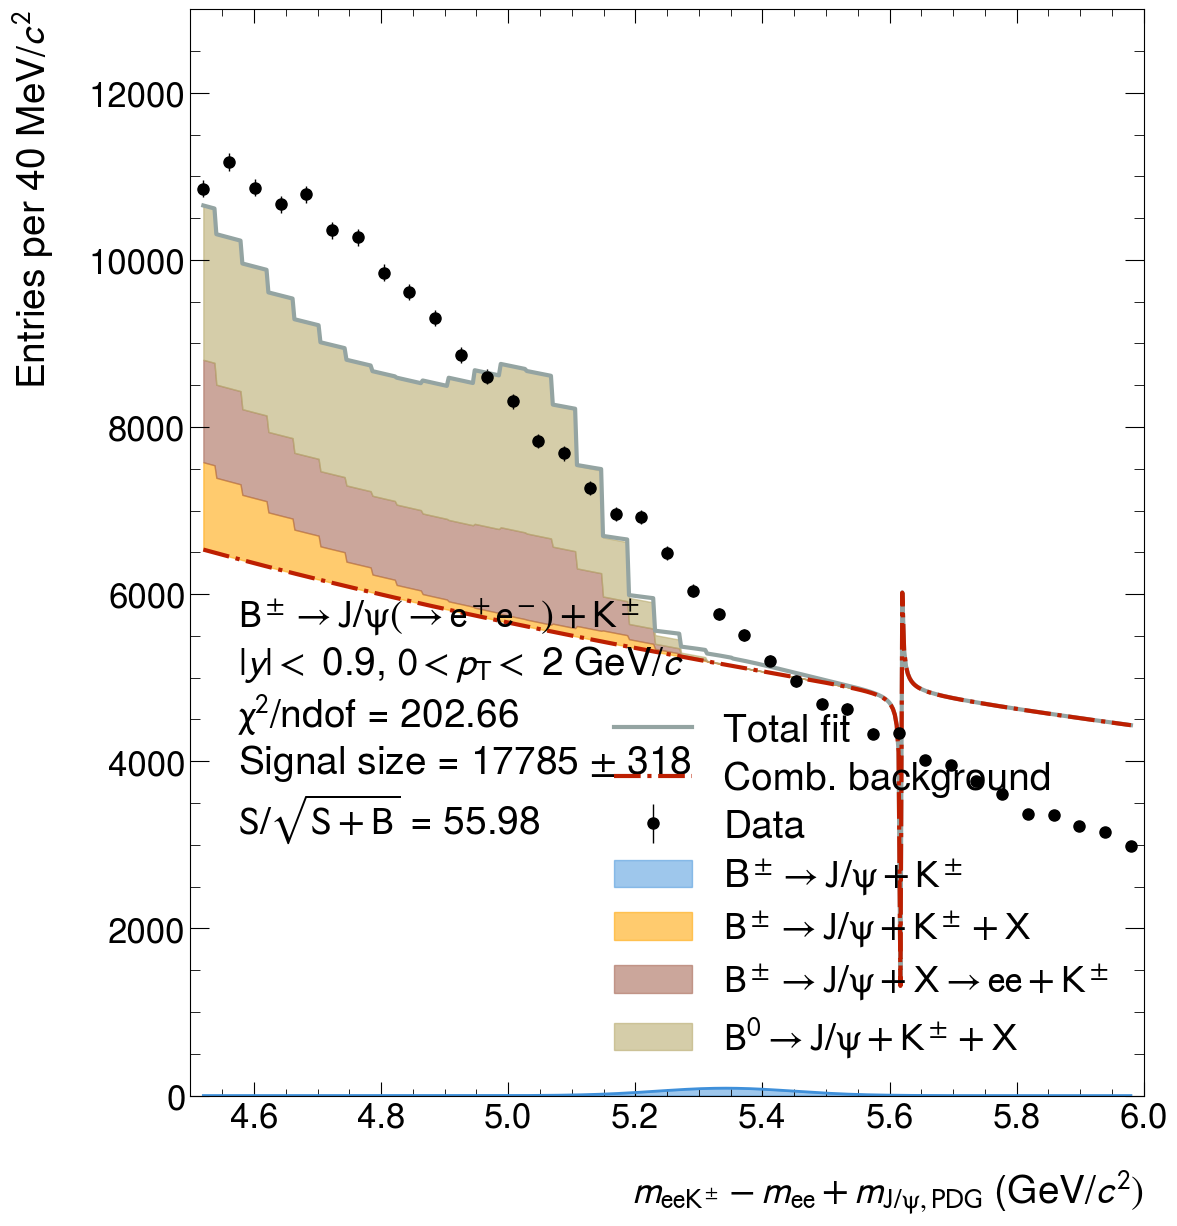

In [54]:
SEbin2(data_with_cuts, mc_with_cuts, ylim=13000, legend_loc="lower right", textbox_position=(0.05, 0.2))

Ratio of Correlated Background to Signal: 0.78


/Users/idats/pyenv/B-team/utils/signalExtractor.py:159: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


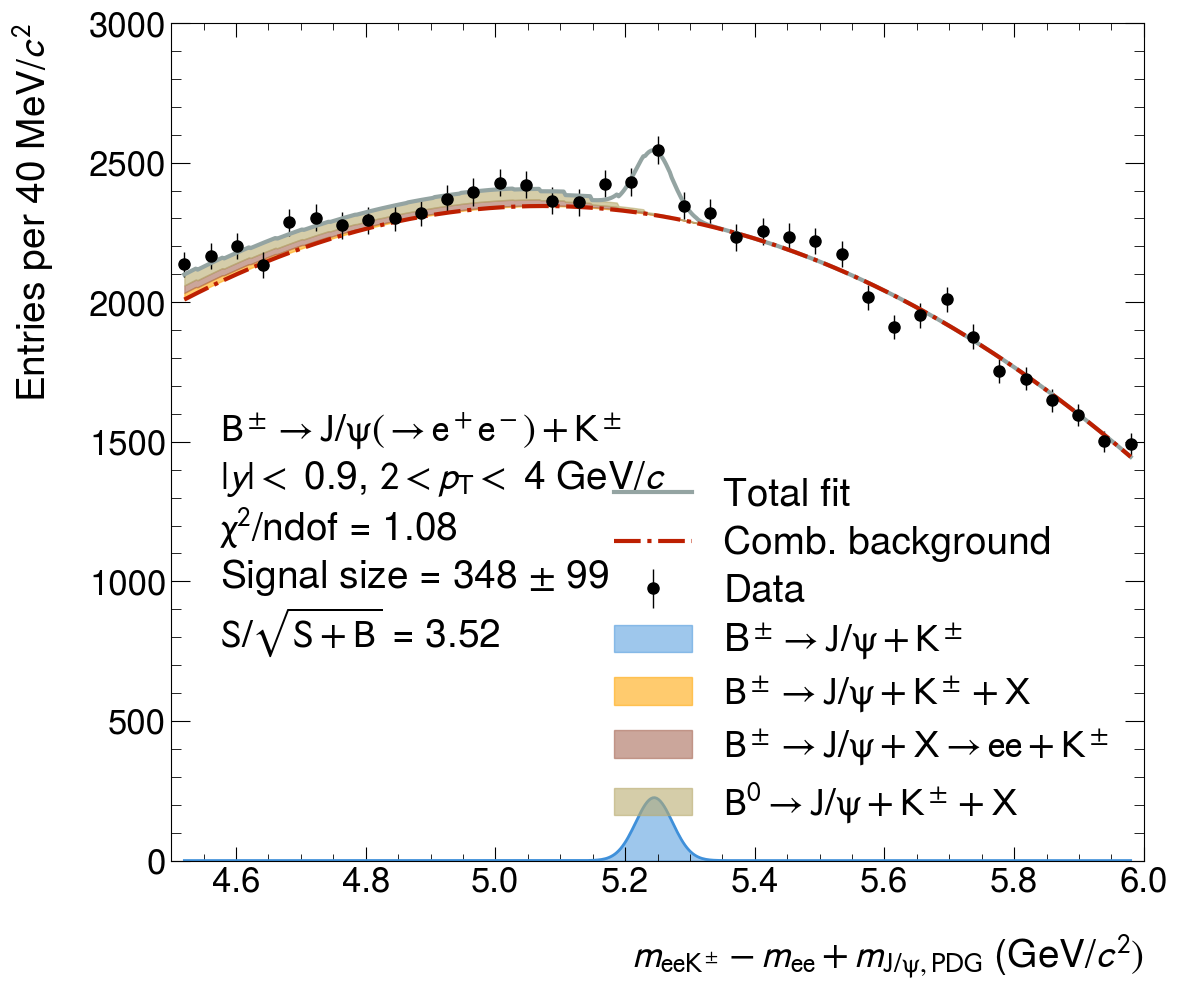

In [27]:
SEbin3(data_with_cuts, mc_with_cuts, ylim=3000, legend_loc="lower right", textbox_position=(0.05, 0.2))

Ratio of Correlated Background to Signal: 0.82


/Users/idats/pyenv/B-team/utils/signalExtractor.py:159: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


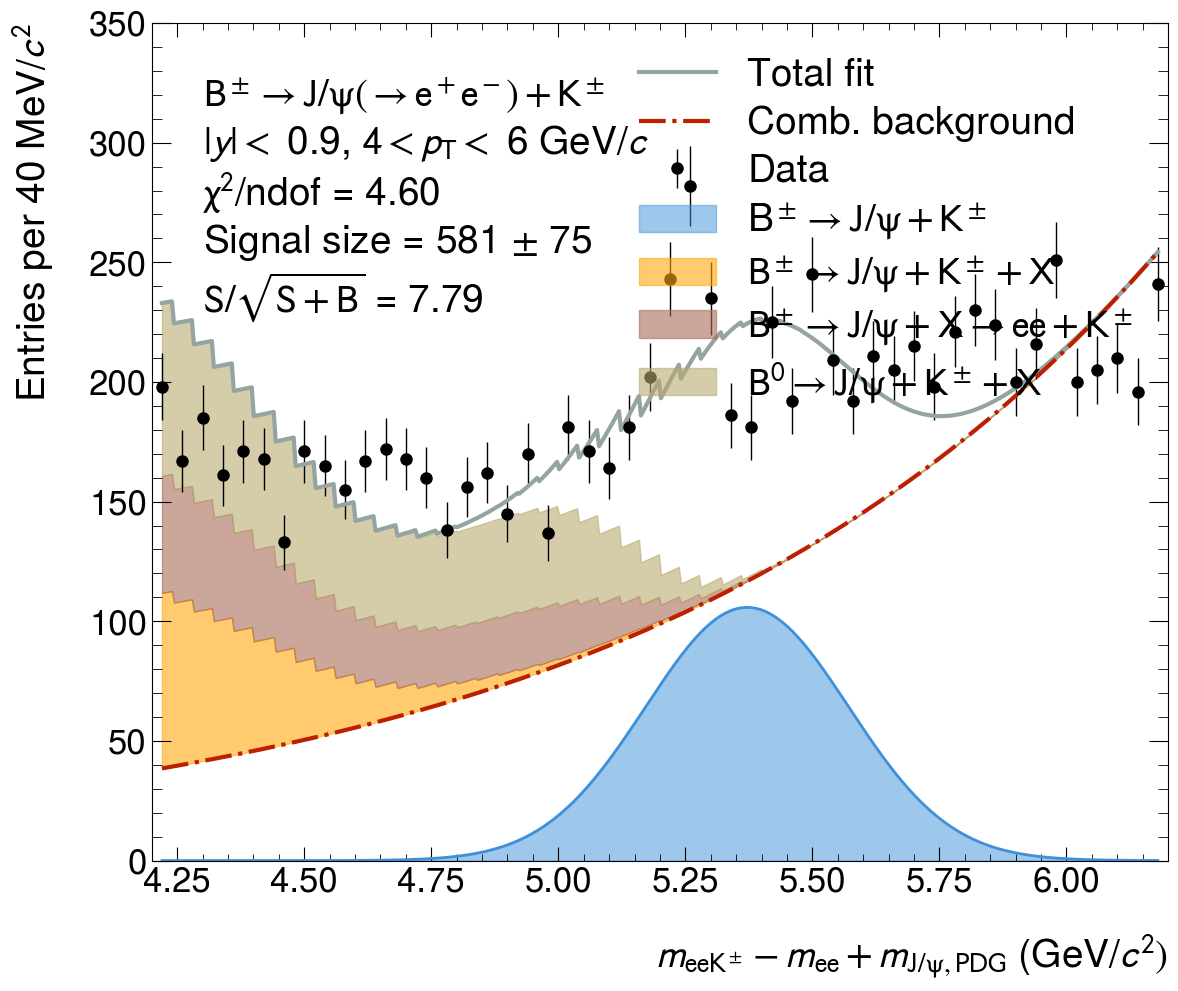

In [19]:
SEbin4(data_with_cuts, mc_with_cuts, ylim=350, legend_loc="upper right", textbox_position=(0.05, 0.6))

Ratio of Correlated Background to Signal: 0.82


/Users/idats/pyenv/B-team/utils/signalExtractor.py:159: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


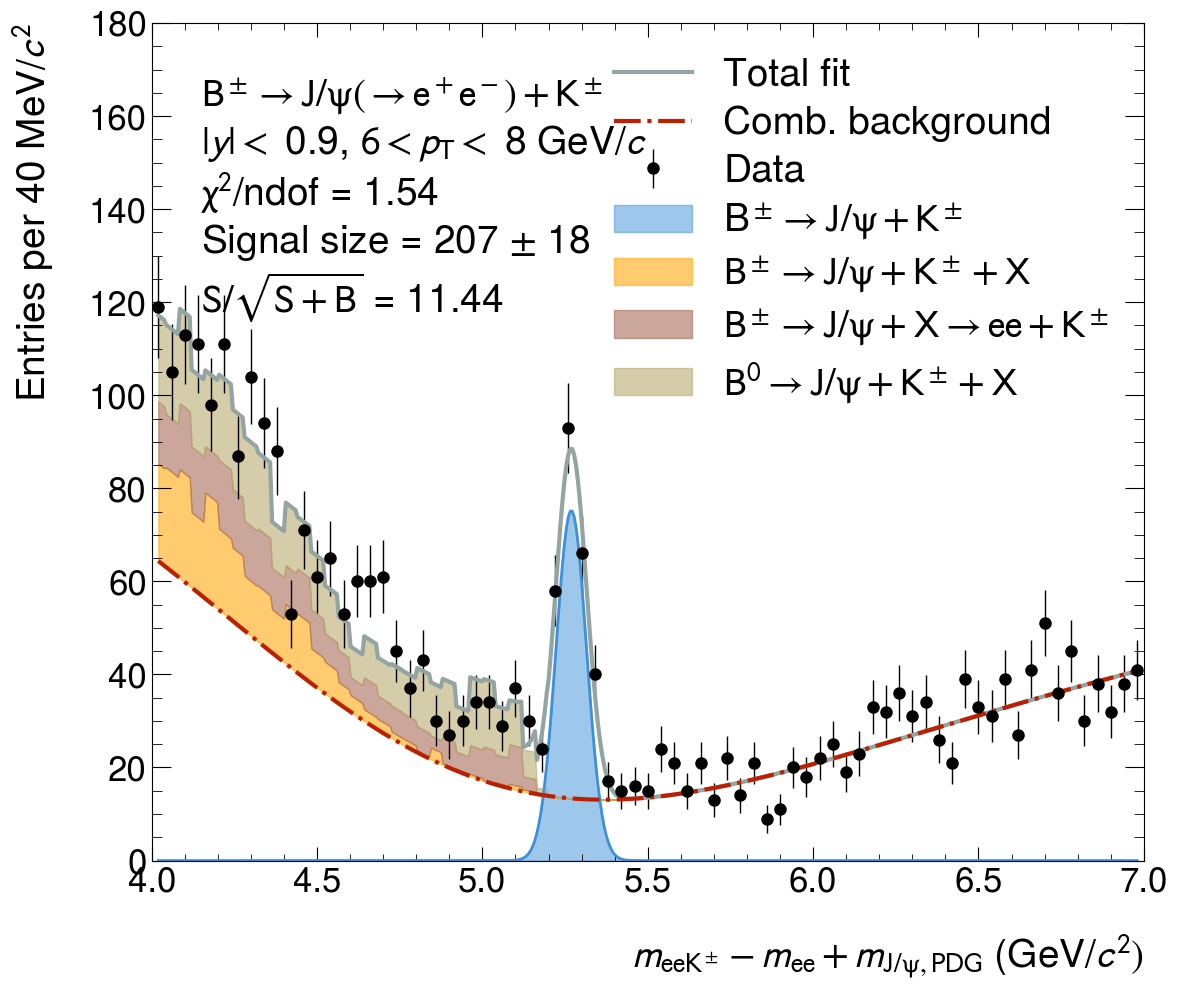

In [20]:
SEbin5(data_with_cuts, mc_with_cuts, ylim=180, legend_loc="upper right", textbox_position=(0.05, 0.6)

Ratio of Correlated Background to Signal: 0.81


/Users/idats/pyenv/B-team/utils/signalExtractor.py:159: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


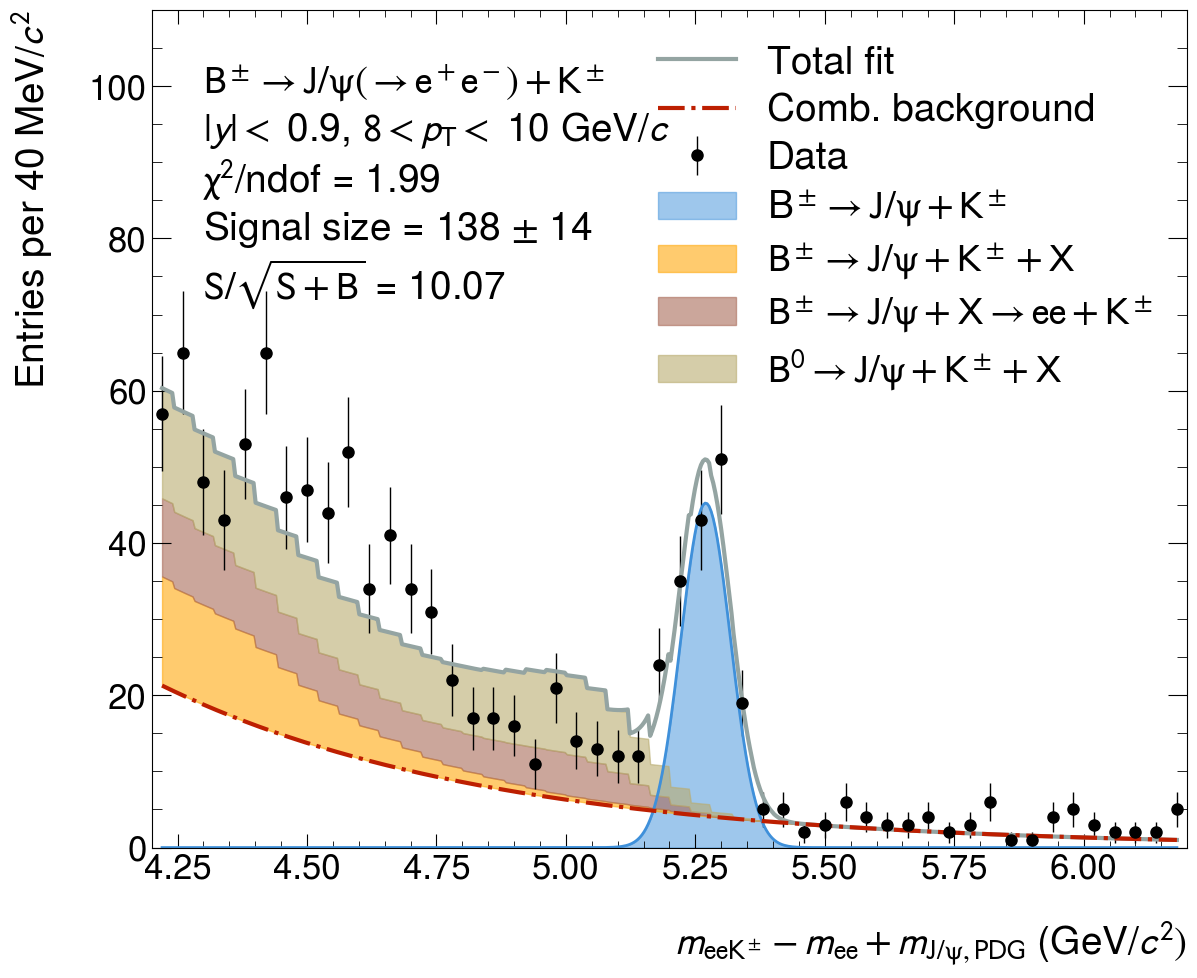

In [21]:
SEbin6(data_with_cuts, mc_with_cuts, ylim=110, legend_loc="upper right", textbox_position=(0.05, 0.6))

Ratio of Correlated Background to Signal: 0.78


/Users/idats/pyenv/B-team/utils/signalExtractor.py:67: RuntimeWarning: overflow encountered in exp
  return (n_corrbkg * self.corrbkg_template_func(x)) + (n_sig * self.gauss(x, mu, sigma)) + (n_combkg * np.exp(a * x))
/Users/idats/pyenv/B-team/utils/signalExtractor.py:159: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


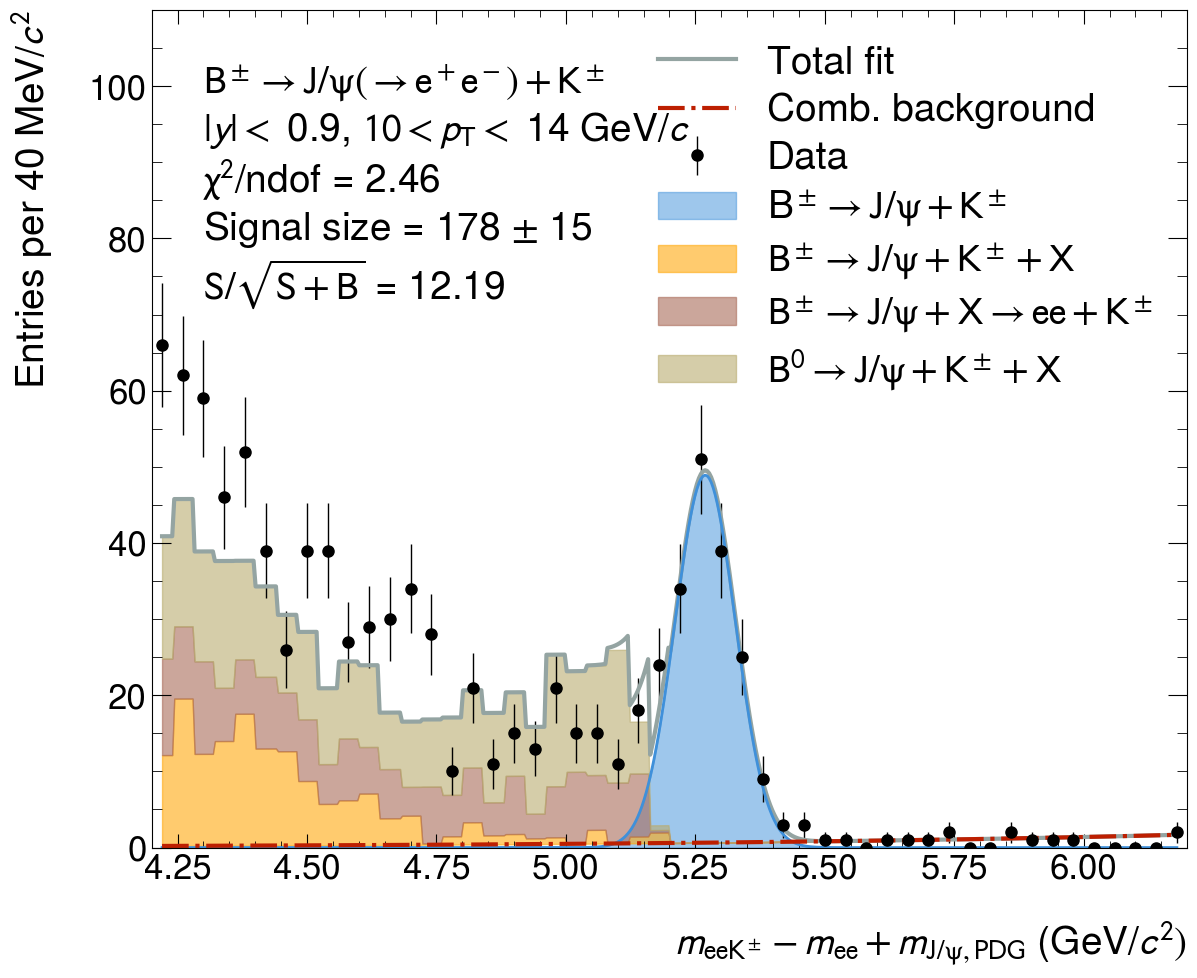

In [22]:
SEbin7(data_with_cuts, mc_with_cuts, ylim=110, legend_loc="upper right", textbox_position=(0.05, 0.6))

Ratio of Correlated Background to Signal: 0.76


/Users/idats/pyenv/B-team/utils/signalExtractor.py:159: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_c, corrbkg_integral_error = integrate.quad(self.corrbkg_template_func, self.settings.fitMin, self.settings.fitMax)


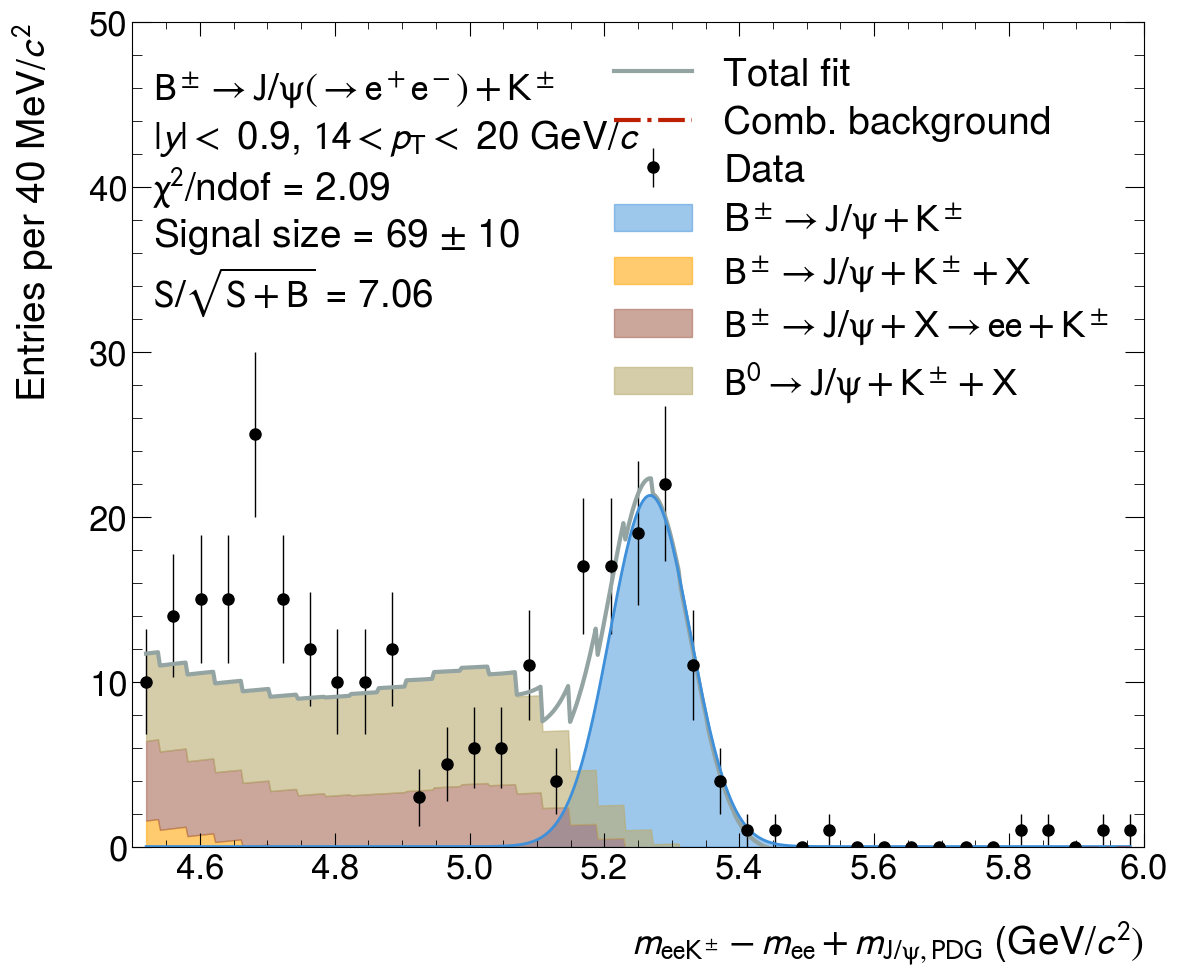

In [23]:
SEbin8(data_with_cuts, mc_with_cuts, ylim=50, legend_loc="upper right", textbox_position=(0.02, 0.60))